In [33]:
# Se importan las bibliotecas requeridas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
import seaborn as sb

import missingno as msno
from category_encoders.one_hot import OneHotEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

## Se instala la libreria que no estaba instalada y vamos a necesitar para nuestro analisis

In [64]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Se carga la base de datos

In [5]:
data = pd.read_csv ("train.csv")


## Mostramos las primeras 5 filas

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Mostramos informacion de las variables

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Mostramos la dimension de la base de datos

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 891
Number of Columns 12


## Histograma de la distribucion de edades

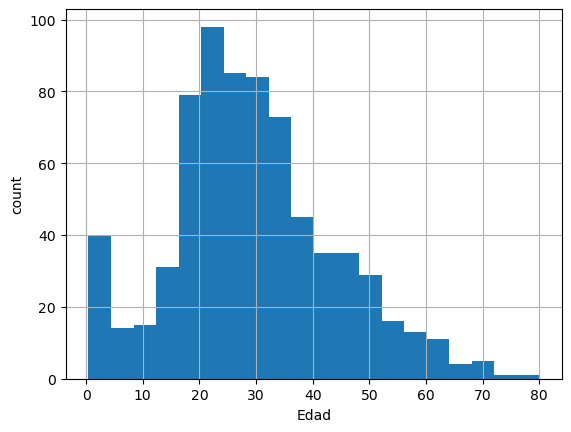

In [11]:
data["Age"].hist(bins=20)
plt.xlabel ("Edad")
plt.ylabel("count")
plt.show()

In [12]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# La edad media de los pasajeros es de 29.7

## Histograma del sexo

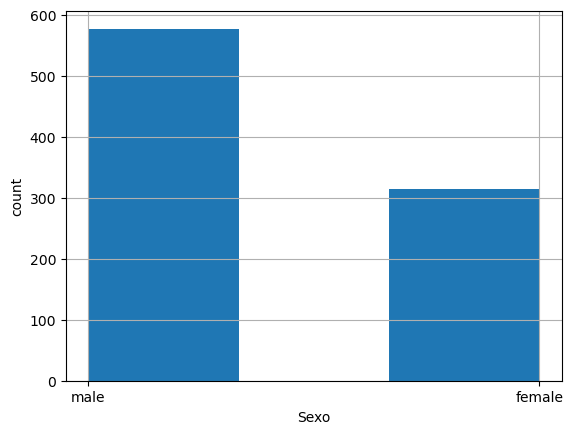

In [13]:
data["Sex"].hist(bins=3)
plt.xlabel ("Sexo")
plt.ylabel("count")
plt.show()

## Porcentaje de sexo

<AxesSubplot:title={'center':'Hombres VS Mujeres'}>

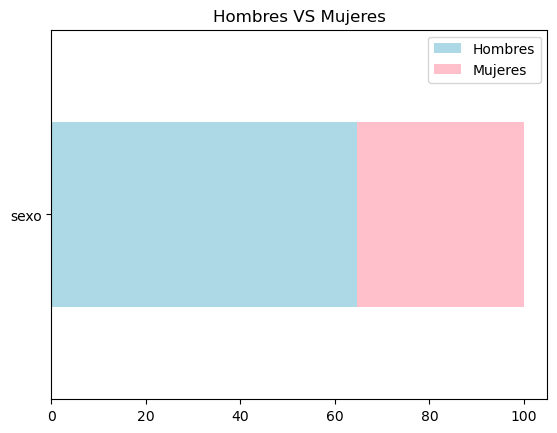

In [14]:
data_sex=pd.DataFrame({'Hombres':data['Sex'].value_counts()[0], 'Mujeres':data['Sex'].value_counts()[1]}, index=['sexo'])
percent_data_sex = data_sex.apply(lambda x: (x * 100) / sum(x), axis=1)
percent_data_sex.plot.barh(stacked=True, title='Hombres VS Mujeres', color={'Hombres':'lightblue', 'Mujeres':'pink'})

In [ ]:
# La mayoría eran hombres (>60%)

## Histograma de supervivencia

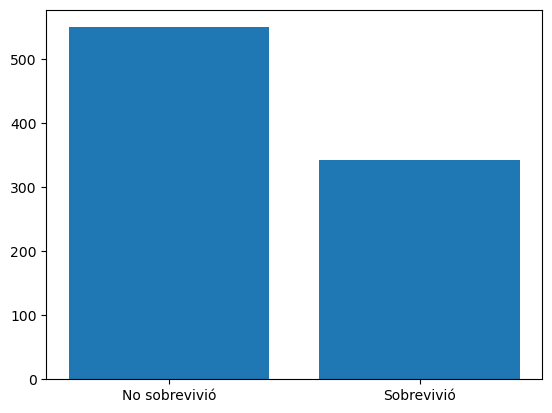

In [15]:
survived_counts = data["Survived"].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0,1], ["No sobrevivió", "Sobrevivió"])
plt.show()

## Porcentaje de supervivencia

<AxesSubplot:title={'center':'No sobrevivió VS Sobrevivió'}>

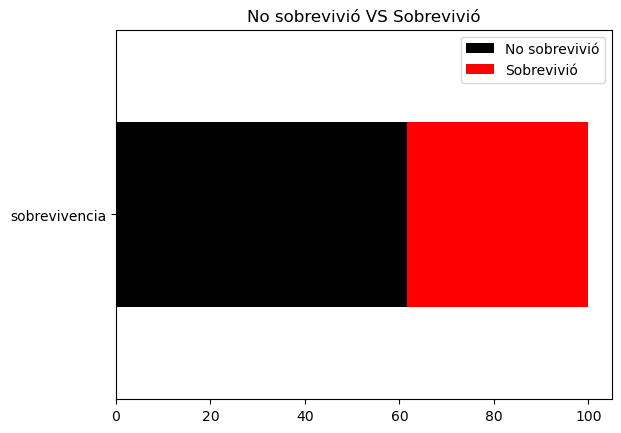

In [16]:
data_Survived=pd.DataFrame({'No sobrevivió':data['Survived'].value_counts()[0], 'Sobrevivió':data['Survived'].value_counts()[1]}, index=['sobrevivencia'])
percent_data_Survived = data_Survived.apply(lambda x: (x * 100) / sum(x), axis=1)
percent_data_Survived.plot.barh(stacked=True, title='No sobrevivió VS Sobrevivió', color={'No sobrevivió':'black', 'Sobrevivió':'red'})

In [ ]:
# La mayoría No sobrevivio (>60%)

## Histograma de clases

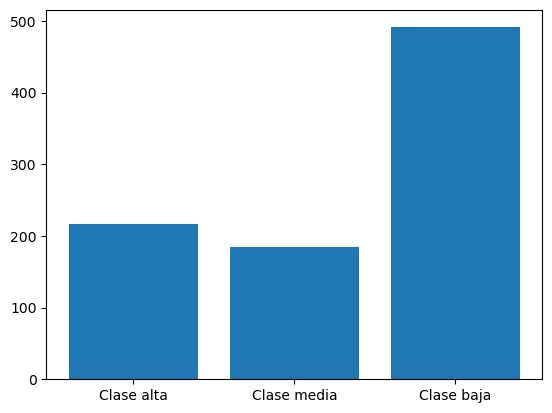

In [17]:
Pclass_counts = data["Pclass"].value_counts()
plt.bar(Pclass_counts.index, Pclass_counts.values)
plt.xticks([1,2,3], ["Clase alta", "Clase media", "Clase baja"] )
plt.show()

## Porcentaje de clases

<AxesSubplot:title={'center':'Clase alta VS Clase Media VS Clase baja'}>

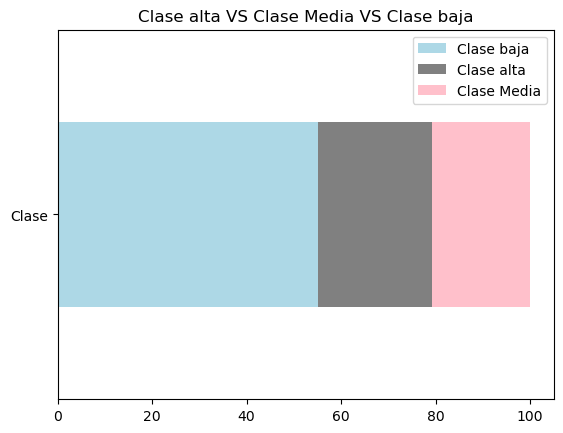

In [18]:
data_pclass=pd.DataFrame({'Clase baja':data['Pclass'].value_counts()[3], 'Clase alta':data['Pclass'].value_counts()[1], 'Clase Media':data['Pclass'].value_counts()[2]}, index=['Clase'])
percent_df_pclass = data_pclass.apply(lambda x: (x * 100) / sum(x), axis=1)
percent_df_pclass.plot.barh(stacked=True, title='Clase alta VS Clase Media VS Clase baja', color={'Clase baja':'lightblue', 'Clase Media':'pink', 'Clase alta':'gray'})

In [ ]:
# analizando la grafica podemos concluir que mas del 50% de los pasajeros eran clase baja, siendo la mayoria.

## Creamos una función para aislar los títulos en 'Nombre'

In [19]:
def title(name_string):
    start=name_string.find(',')+2
    end=name_string.find('.')
    name_string=name_string[start:end]
    return name_string

### aplicamos la funcion

In [20]:
data['Name']=data['Name'].apply(lambda title_conv: title(title_conv))

In [21]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


### Comprobamos las categorías creadas en 'Nombre

In [22]:
data['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [23]:
onehotenc=OneHotEncoder(cols=['Sex', 'Embarked'])
data=onehotenc.fit_transform(data)

In [24]:
data=pd.get_dummies(data, columns=['Name'])

### Sumamos las funciones 'SibSp' y 'Parch' en una sola función llamada 'Family

In [26]:
data['Family']=""
data['Family']=data['SibSp']+data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

## Creamos la funcion para generar las etapas de edad

In [28]:
def age_category(age_vl):
    if age_vl>0 and age_vl<13:
        return 'Child'
    elif age_vl>=13 and age_vl<18:
        return 'Teen'
    elif age_vl>=18 and age_vl<60:
        return 'Adult'
    elif age_vl>=60:
        return 'Elder'
    else:
        return age_vl

## Visualizamos la matriz de correlacion

In [31]:
data.corr()

,PassengerId,Survived,Pclass,Sex_1,Sex_2,Age,Fare,Embarked_1,Embarked_2,Embarked_3,...,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Family
PassengerId,1.000000e+00,-0.005007,-0.035144,0.042939,-0.042939,0.036847,0.012658,0.022148,-0.001205,-0.033606,...,-0.073110,0.042506,-0.009904,0.038850,0.011245,-0.000261,0.012698,0.020070,0.040921,-0.040143
Survived,-5.006661e-03,1.000000,-0.338481,-0.543351,0.543351,-0.077221,0.257307,-0.155660,0.168240,0.003650,...,0.327093,0.060095,0.042470,-0.549199,0.339040,0.042470,-0.064988,0.042470,0.042470,0.016639
Pclass,-3.514399e-02,-0.338481,1.000000,0.131900,-0.131900,-0.369226,-0.549500,0.081720,-0.243292,0.221009,...,-0.000576,-0.074282,-0.052496,0.142698,-0.149209,-0.012381,-0.030413,-0.052496,-0.052496,0.065997
Sex_1,4.293888e-02,-0.543351,0.131900,1.000000,-1.000000,0.093254,-0.182333,0.125722,-0.082853,-0.074115,...,-0.686808,-0.064296,-0.045439,0.867334,-0.547600,-0.045439,0.060741,0.024728,-0.045439,-0.200988
Sex_2,-4.293888e-02,0.543351,-0.131900,-1.000000,1.000000,-0.093254,0.182333,-0.125722,0.082853,0.074115,...,0.686808,0.064296,0.045439,-0.867334,0.547600,0.045439,-0.060741,-0.024728,0.045439,0.200988
Age,3.684720e-02,-0.077221,-0.369226,0.093254,-0.093254,1.000000,0.096067,-0.032523,0.036261,-0.022405,...,-0.276792,-0.020808,-0.014703,0.206341,0.180278,-0.004384,0.085407,0.049794,0.008516,-0.301914
Fare,1.265822e-02,0.257307,-0.549500,-0.182333,0.182333,0.096067,1.000000,-0.166603,0.269335,-0.117216,...,0.118271,0.025974,0.025037,-0.183766,0.105203,-0.012961,-0.023031,0.016687,0.036645,0.217138
Embarked_1,2.214778e-02,-0.155660,0.081720,0.125722,-0.125722,-0.032523,-0.166603,1.000000,-0.778359,-0.496624,...,-0.134000,-0.076588,-0.054125,0.118482,-0.002512,0.020759,0.020335,-0.054125,0.020759,0.079977
Embarked_2,-1.204795e-03,0.168240,-0.243292,-0.082853,0.082853,0.036261,0.269335,-0.778359,1.000000,-0.148258,...,0.026215,0.098396,0.069538,-0.072567,0.061395,-0.016158,-0.039691,0.069538,-0.016158,-0.046215
Embarked_3,-3.360570e-02,0.003650,0.221009,-0.074115,0.074115,-0.022405,-0.117216,-0.496624,-0.148258,1.000000,...,0.171117,-0.014588,-0.010310,-0.078338,-0.089739,-0.010310,0.023515,-0.010310,-0.010310,-0.058592


## Mostramos el mapa de calor a partir de la matriz de correlacion.

<AxesSubplot:>

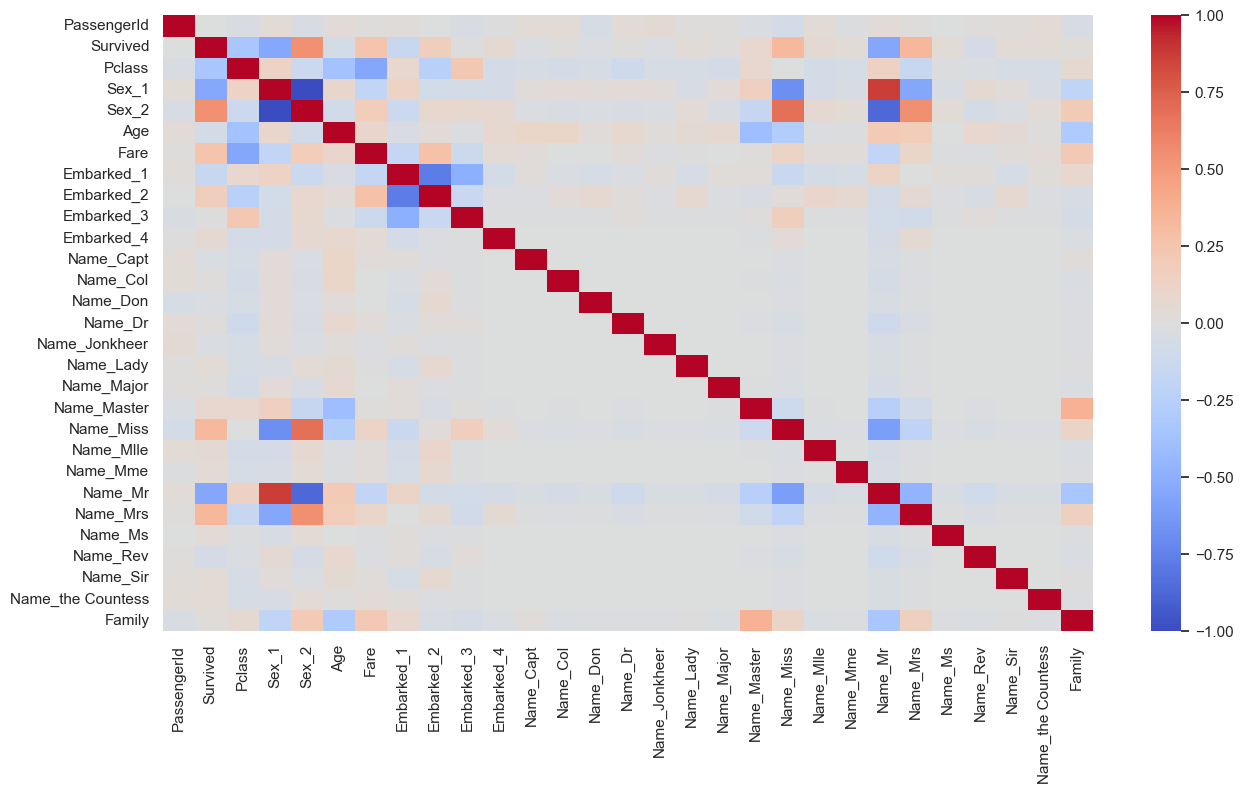

In [34]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

# En base a los resultados obtenidos por la correlacion podemos concluir:
### - Sobrevivieron mas mujeres que hombres.
### - Existe una pequeña correlacion positiva, entre el numero total de familiares y la supervivencia.
### - Existe una pequela correlacion negativa, entre edad y la supervivencia.
### - La supervivencia aumenta a medida que la clase aumenta.
### - Existe una correlación positiva entre la tarifa y la supervivencia.
### - Las personas que se embarcaron en Cherburgo sobrevivieron más.
### - La gente que se embarcaba en Southampton moría más.
### - Entre los títulos, Miss y Mrs. sobrevivieron más, y Mr. sobrevivió menos.
###   Esto es consistente con el hecho de que las mujeres sobrevivieron más que los hombres.


## Comparación del estado de supervivencia entre hombres y mujeres:

[Text(0.5, 1.0, 'Número de sobrevivientes (Survived=1) y muertos (Survived=0) de cada sexo')]

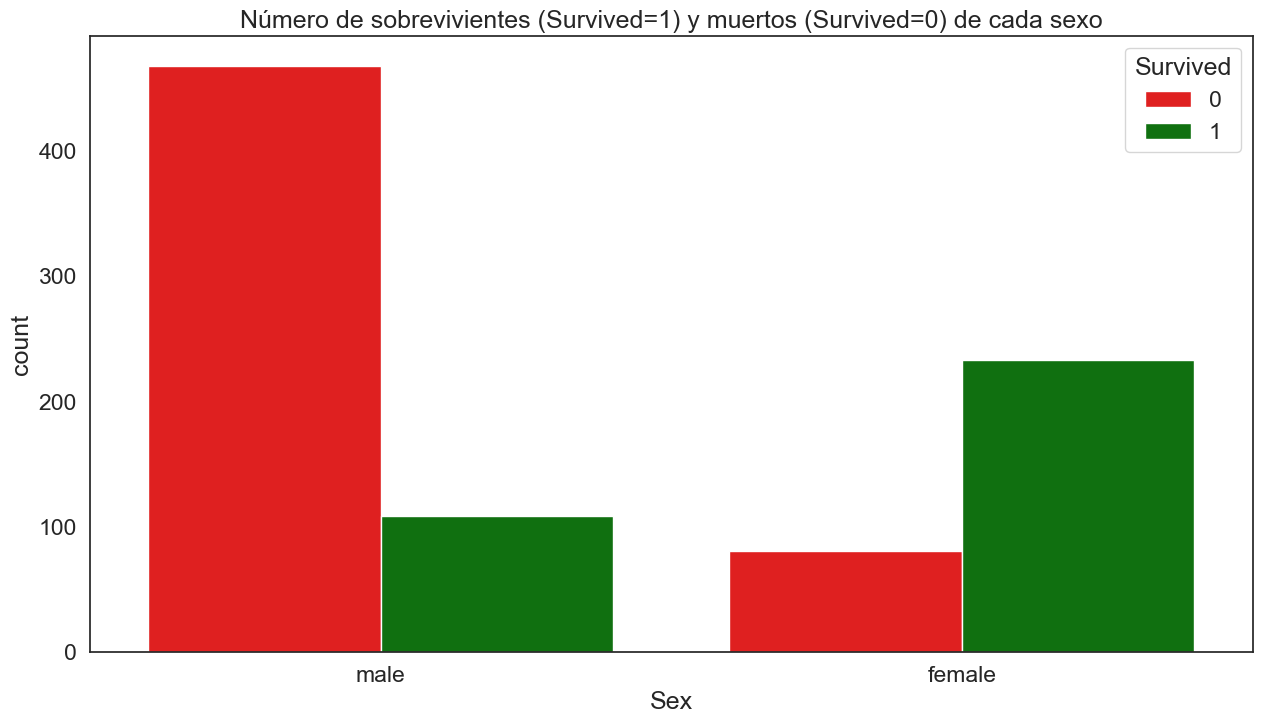

In [42]:
data_sex=pd.read_csv("train.csv")

surv_sex_graph=sb
surv_sex_graph.set(style='white', rc = {'figure.figsize':(15,8)}, font_scale=1.5)
cols=['green' if x==1 else 'red' for x in data.Survived]
surv_sex_graph.countplot(data=data_sex, x='Sex', hue='Survived', palette=cols).set(title='Número de sobrevivientes (Survived=1) y muertos (Survived=0) de cada sexo')